<a href="https://colab.research.google.com/github/Parth-nXp/CNN_mini_projects/blob/main/fake_data_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchsummary import summary
from torchvision import transforms, datasets
from torch.optim import Adam

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [11]:
dataset = datasets.FakeData(
    size = 1000,
    image_size= [3, 32, 32],
    num_classes = 10,
    transform = transforms.ToTensor()
)
image, label = dataset[0]
print(f"Image shape: {image.shape}")
print(f"Label: {label}")

Image shape: torch.Size([3, 32, 32])
Label: 7


In [12]:
dataloader = DataLoader(dataset, batch_size = 32, shuffle = True)

In [32]:
out_channel_1_number = 16

class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()

    self.layer1 = nn.Conv2d(in_channels=3, out_channels = out_channel_1_number, kernel_size= 3, padding = 1)
    self.relu =nn.ReLU()
    self.pool = nn.MaxPool2d(kernel_size = 2, stride=2)
    self.flatten = nn.Flatten()
    self.linear = nn.Linear(4096, 10)


  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x)
    x = self.pool(x)
    x = self.flatten(x)
    x = self.linear(x)
    return x

model = SimpleCNN().to(device)

In [33]:
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
              ReLU-2           [-1, 16, 32, 32]               0
         MaxPool2d-3           [-1, 16, 16, 16]               0
           Flatten-4                 [-1, 4096]               0
            Linear-5                   [-1, 10]          40,970
Total params: 41,418
Trainable params: 41,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.31
Params size (MB): 0.16
Estimated Total Size (MB): 0.48
----------------------------------------------------------------


In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr = 0.001)

In [35]:
total_loss_plot = []
epochs = 100

for epoch in range(epochs):
  total_loss = 0
  for images, labels in dataloader:
    images = images.to(device)
    labels = labels.to(device)

    prediction = model(images)
    batch_loss = criterion(prediction, labels)

    total_loss += batch_loss.item()
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  total_loss_plot.append(round(total_loss / 1000 , 4))
  print(f"Epoch: {epoch+1}, Loss: {total_loss_plot[-1]}")
  print("="*25)

Epoch: 1, Loss: 0.079
Epoch: 2, Loss: 0.073
Epoch: 3, Loss: 0.0698
Epoch: 4, Loss: 0.0659
Epoch: 5, Loss: 0.0606
Epoch: 6, Loss: 0.0556
Epoch: 7, Loss: 0.05
Epoch: 8, Loss: 0.0437
Epoch: 9, Loss: 0.0386
Epoch: 10, Loss: 0.0338
Epoch: 11, Loss: 0.0274
Epoch: 12, Loss: 0.0226
Epoch: 13, Loss: 0.0183
Epoch: 14, Loss: 0.0164
Epoch: 15, Loss: 0.0127
Epoch: 16, Loss: 0.01
Epoch: 17, Loss: 0.0085
Epoch: 18, Loss: 0.0072
Epoch: 19, Loss: 0.0058
Epoch: 20, Loss: 0.005
Epoch: 21, Loss: 0.0043
Epoch: 22, Loss: 0.0036
Epoch: 23, Loss: 0.0033
Epoch: 24, Loss: 0.0028
Epoch: 25, Loss: 0.0025
Epoch: 26, Loss: 0.0023
Epoch: 27, Loss: 0.0019
Epoch: 28, Loss: 0.0017
Epoch: 29, Loss: 0.0016
Epoch: 30, Loss: 0.0015
Epoch: 31, Loss: 0.0013
Epoch: 32, Loss: 0.0012
Epoch: 33, Loss: 0.0011
Epoch: 34, Loss: 0.001
Epoch: 35, Loss: 0.0009
Epoch: 36, Loss: 0.0009
Epoch: 37, Loss: 0.0008
Epoch: 38, Loss: 0.0008
Epoch: 39, Loss: 0.0007
Epoch: 40, Loss: 0.0007
Epoch: 41, Loss: 0.0006
Epoch: 42, Loss: 0.0006
Epoch: 43

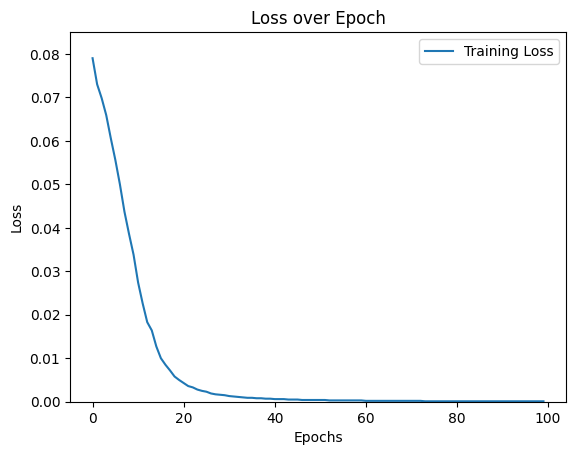

In [38]:
plt.plot(total_loss_plot, label = "Training Loss")
plt.title("Loss over Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0, 0.085])
plt.legend()


plt.show()